In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn_tda as sktda
import statmapper as stm
import networkx as nx

from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from stochmapper import EntropyRegularizedWasserstein, AgglomerativeCover, VoronoiCover, StochasticMapperComplex

In [2]:
num_pts = 20 * 20

Generate torus.

In [3]:
c, a = 2, 1

In [4]:
theta = np.linspace(0, 2.*np.pi, int(np.sqrt(num_pts)))
phi = np.linspace(0, 2.*np.pi, int(np.sqrt(num_pts)))
theta, phi = np.meshgrid(theta, phi)
x = ((c + a*np.cos(theta)) * np.cos(phi)).flatten()
y = (a * np.sin(theta)).flatten()
z = ((c + a*np.cos(theta)) * np.sin(phi)).flatten()

Visualize smooth torus.

<IPython.core.display.Javascript object>


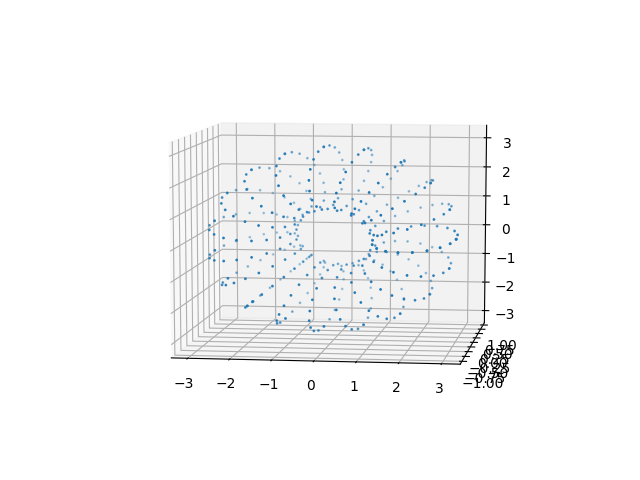

In [96]:
%matplotlib notebook
fig = plt.figure()
ax  = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, s=1.)
plt.show()

Now, assign a Gaussian probability distribution for each point.

In [5]:
distributions = []
for i in range(num_pts):
    distributions.append(np.random.normal(loc=z[i], scale=.5, size=100))

In [60]:
erw = EntropyRegularizedWasserstein(epsilon=1e-1)
wass = np.zeros([num_pts, num_pts])
for i in range(num_pts):
    for j in range(i+1, num_pts):
        wass[i,j] = erw.compute_distance(distributions[i], distributions[j])
        wass[j,i] = wass[i,j]

Visualize a given realization.

In [7]:
z_pert = np.array([distributions[i][0] for i in range(num_pts)])

<IPython.core.display.Javascript object>


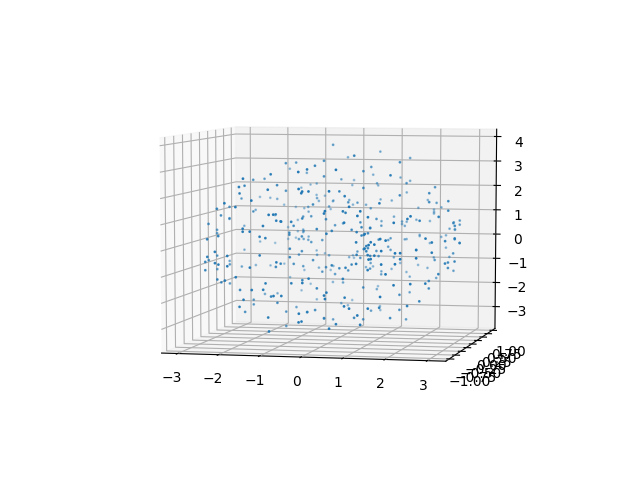

In [97]:
%matplotlib notebook
fig = plt.figure()
ax  = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z_pert, s=1.)
plt.show()

Compute standard Mapper of the underlying object.

In [8]:
mapper = sktda.MapperComplex(
    filters=np.reshape(z, [-1,1]), filter_bnds=np.array([[np.nan, np.nan]]),
    resolutions=np.array([5]),    gains=np.array([.3]),
    colors=np.reshape(z, [-1,1]),
    clustering=AgglomerativeClustering(n_clusters=None, linkage="single", distance_threshold=1.)
                            ).fit(np.stack([x,y,z], axis=-1))

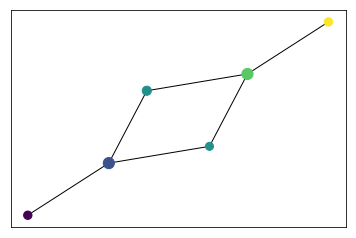

In [9]:
G = stm.mapper2networkx(mapper)
nx.draw_networkx(G, with_labels=False,
                 node_color=[mapper.node_info_[name]["colors"][0] for name in G.nodes()],
                 node_size=[len(mapper.node_info_[name]["indices"]) for name in G.nodes()])

Compute standard Mapper of a given realization.

In [10]:
mapper = sktda.MapperComplex(
    filters=np.reshape(z_pert, [-1,1]), filter_bnds=np.array([[np.nan, np.nan]]),
    resolutions=np.array([5]), gains=np.array([.3]),
    colors=np.reshape(z, [-1,1]),
    clustering=AgglomerativeClustering(n_clusters=None, linkage="single", distance_threshold=1.)
                            ).fit(np.stack([x,y,z], axis=-1))

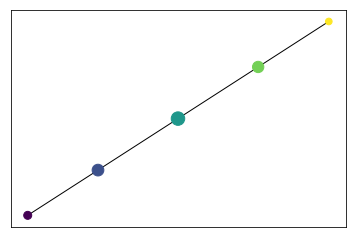

In [11]:
G = stm.mapper2networkx(mapper)
nx.draw_networkx(G, with_labels=False,
                 node_color=[mapper.node_info_[name]["colors"][0] for name in G.nodes()],
                 node_size=[len(mapper.node_info_[name]["indices"]) for name in G.nodes()])

Compute stochastic Mapper. 

In [93]:
mapper = StochasticMapperComplex(
    distributions=distributions, distance=wass, #EntropyRegularizedWasserstein(epsilon=1e-1),
    cover=VoronoiCover(n_patches=10, threshold=.1475),
    colors=np.reshape(z, [-1,1]),
    clustering=AgglomerativeClustering(n_clusters=None, linkage="single", distance_threshold=1.)
                            ).fit(np.stack([x,y,z], axis=-1))

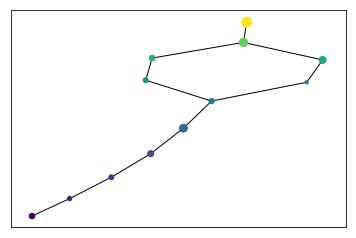

In [95]:
G = stm.mapper2networkx(mapper)
nx.draw_networkx(G, with_labels=False,
                 node_color=[mapper.node_info_[name]["colors"][0] for name in G.nodes()],
                 node_size=[len(mapper.node_info_[name]["indices"]) for name in G.nodes()])